# Did Men had a higher chances of mortality in Titanic?

This project analyses the titanic data using python dataframe and other functionalities. There are many legends and assumptions over the years. Some of the assumptions or bias were based on Hollywood movie and other legend. I would like to test some of the assumption based on the sample data provided.




# Load the data from the CSV file

In [204]:
import pandas as pd

titanicdata_df = pd.read_csv('titanic-data.csv')

In [205]:
# Total number of data

titanicdata_df.count()
total_passengers = len(titanicdata_df)

# Data wrangling and extracting key data

In the first analysis, I would like to explore the different titles from the names. For doing this, I would like to split the names to extract the titles and store it in the data frame. I have printed out the unique titles to have a view.

In [206]:
# Extract the titles from the names and count the number of Royalities like Mme, Countess etc and added the column 
# title in the data
names_df = pd.DataFrame()
if 'Title' not in titanicdata_df.columns:
    names_df['Name']= titanicdata_df['Name'].astype(str)
    title = names_df['Name'].str.split(',', 0).str[1].str.split('.',1).str[0]
    titanicdata_df.insert(loc=3,column= 'Title',value = title)

# Get Unique Titles from the names

In [207]:
title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

The title does not give sufficient data to purse if the Royalties survived the distaster conclusively. It was a good investigation and data wrangling exercise

# The Data Analysis of the various parameters linking the mortality

In [208]:
# Define the various parameters for analysis: survivors, dead, number by class, male and female. The class here 
# represents social division which may have existed based on the ticket class.

survived = titanicdata_df['Survived'] == 1 # Passengers who survived
died = titanicdata_df['Survived'] == 0 # Passesngers who died
class3 = titanicdata_df['Pclass'] == 3 # Passengers from 3rd class
class2 = titanicdata_df['Pclass'] == 2 # Passengers from 2nd class
class1 = titanicdata_df['Pclass'] == 1 # Passengers from 1st class
male   = titanicdata_df['Sex'] == 'male' # Male passengers
female = titanicdata_df['Sex'] == 'female' # Female passengers
nocabin = titanicdata_df['Cabin'] ==  'None'
family_siblings = titanicdata_df['SibSp'] != 0
family_children = titanicdata_df['Parch'] != 0
family = family_siblings | family_children # Define family based on the famly size.
children = titanicdata_df['Age'] < 18 # Child passengers - here defined as under 18

The next data wrangling done was to define the family based on the criteria if there are siblings or children defined in the data. The two data flags used were SibSP and Parch to count the family size.

# Passenger distribution in the data set

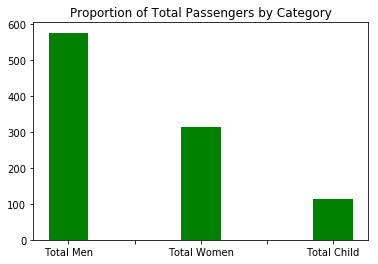

In [209]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

width = 0.3
total_pop = [total_men, total_women, total_child]
index = len(total_pop)
x = [u' ',u'Total Men', u' ', u'Total Women',u' ',u'Total Child']
ind = np.arange(len(total_pop)) 
fig, ax = plt.subplots()
plt.title("Proportion of Total Passengers by Category")
plt.bar(ind, total_pop, width, color="green")
ax.set_xticklabels(x)
plt.show()

# Total number of passengers who died

In [210]:
# Total Number of passgenger in the data

total_passengers = len(titanicdata_df)
# Total passengers who died

total_died = len(titanicdata_df[died])
total_survived = len(titanicdata_df[survived])


# Total number of male passenger 

In [211]:
# total number of males 

total_men = len(titanicdata_df[male])

# Proportion of total number of men compared to the total passengers

In [212]:
p_men = round(float(total_men)/float(total_passengers),2)


# Total Number of male passengers who died

In [213]:
# Total number of males who died

dead_men =  len(titanicdata_df[died & male])

# Proportion of dead men in the population

p_dead_men = round(float(dead_men)/float(total_passengers),2)

# Total Number of male passengers died by class

In [214]:
# Total number of males who died by class (representing the social class)

titanicdata_df[died & male].count()
dead_men =  len(titanicdata_df[died & male])

# Proportion of dead men in the population

p_dead_men = round(float(dead_men)/float(total_passengers),4)

men_first = len(titanicdata_df[died & male & class1])
men_second = len(titanicdata_df[died & male & class2])
men_third = len(titanicdata_df[died & male & class3])

# Proportion of dead men by class of the total men
p_men_first = round(float(men_first)/float(dead_men),4)
p_men_second = round(float(men_second)/float(dead_men),4)
p_men_third = round(float(men_third)/float(dead_men),4)

# Total number of female passengers

In [215]:
# Total number of female

total_women = len(titanicdata_df[female])

# Number of women who died

In [216]:
# Total number of women who died

titanicdata_df[died & female].count()
dead_women =  len(titanicdata_df[died & female])

# Proportion of dead women in the population

p_dead_women = round(float(dead_women)/float(total_passengers),4)

In [217]:
# Total number of children

total_child = len(titanicdata_df[children])

# Number of Children who died

In [218]:
# Total number of children who died

titanicdata_df[died & children].count()
dead_child =  len(titanicdata_df[died & children])

# Proportion of dead children in the population

p_dead_child = round(float(dead_child)/float(total_passengers),4)

In [219]:
# Total number of children died who were traveling with parents

total_ch_family = len(titanicdata_df[died & children & family_children])
print total_ch_family

36


In [220]:
# Total number of family members who survived. 

titanicdata_df[survived & family].describe()
total_fam_survived = len(titanicdata_df[survived & family])
print total_fam_survived

179


In [221]:
# Total number of family members
titanicdata_df[family].count()

PassengerId    354
Survived       354
Pclass         354
Title          354
Name           354
Sex            354
Age            310
SibSp          354
Parch          354
Ticket         354
Fare           354
Cabin          110
Embarked       354
dtype: int64

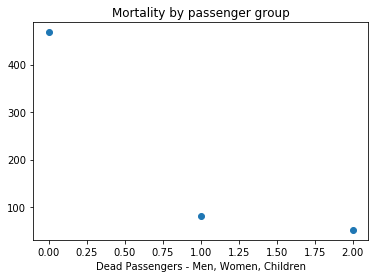

In [222]:
# Plot basic mortality data distribution

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hist_data = dead_men, dead_women, dead_child
ind = len(hist_data)
Labels = ["Men","Women","Children"]
plt.title("Mortality by passenger group")
plt.plot(hist_data,"o")
plt.xlabel("Dead Passengers - Men, Women, Children")
plt.show()

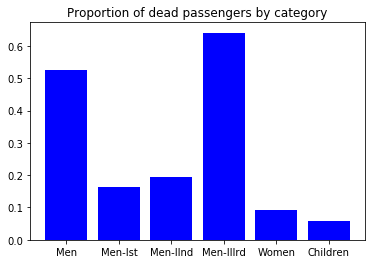

In [223]:
# Representing all the proportions in a dataframe
prop_all = p_dead_men, p_men_first,p_men_second ,p_men_third, p_dead_women, p_dead_child

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

width = 0.8
index = len(prop_all)
x = [u' ', u'Men',u'Men-Ist', u'Men-IInd', u'Men-IIIrd', u'Women', u'Children']
ind = np.arange(len(prop_all)) 
fig, ax = plt.subplots()
plt.title("Proportion of dead passengers by category")
plt.bar(ind, prop_all, width, color="blue")
ax.set_xticklabels(x)
plt.show()

The following are the high level summary of the data:
    
1. The proportion men who died is significantly higher than the proportion of women and children. This needs to be ascertained as there are clearly more number of men than women and children.
2. There is no significant difference in the mortality rate of women and children
3. There are significantly higher number of men who died in the 3rd class 
4. There is no significant difference in the proportion of the men who died between the second and the third class

Some of the key computational considerations are as follows.

1. The proportion of total fatalities by catagories were computed with the total population. For example, proportion of total men who died was calculated as total men died/total number of people. Similarly for Women and Children, this is to make test an assumption that everyone in the titanic had an equal chance of survival.
2. The proportion of the men by class was taken against the total population of men. For example, proportion of fatalities in the first class was against the total fatalities of men. This is to test the assumption that people in the higer class clearly had better chance of survival


I will use statisitical inference test to validate some of the hypothesis. For this, I will be using the one sample test using proportions:
z = (p-sam - p0)/sqrt(p0*(1-p0)/n)

In [224]:
print prop_all

(0.5253, 0.1645, 0.1944, 0.641, 0.0909, 0.0584)


# Survivor Statistics 

I would also like to look at the survivor statistics to get an understanding of survivor statistics.

In [225]:
# Total men who survived
sur_men =  len(titanicdata_df[survived & male])

# Total women who survived
sur_women = len(titanicdata_df[survived & female])

# Total children who survived
sur_child = len(titanicdata_df[survived & children])


# Plot the survivor dataset 

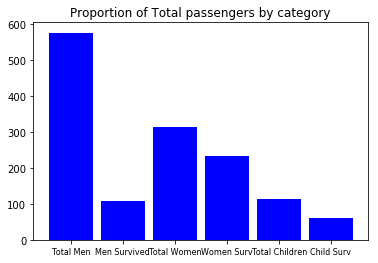

In [226]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Total_Survivor_Data = total_men, sur_men, total_women, sur_women, total_child, sur_child
width = 0.85
index = len(prop_all)
x = [u' ', u'Total Men',u'Men Survived', u'Total Women', u'Women Surv', u'Total Children', u'Child Surv']
ind = np.arange(len(prop_all)) 
fig, ax = plt.subplots()
plt.title("Proportion of Total passengers by category")

plt.bar(ind, Total_Survivor_Data, width, color="blue")
ax.set_xticklabels(x, fontsize=8)
plt.show()

Analyising the survivor statistics, there is a clear indication that significantly less number of men survived compared to the others. However, in terms of absolute value the numbers of survivors are nearly the same across all categories. It will be interesting to analyse the data in detail to ascertain if there are significantly different number of mortality rates statistically.

# Function to calculate z value given the proportion probability

In [227]:
# Define a function to determine the z value based on
# the proportion value from the sample, proportion value for the test and sample size
import math
def zStats(p_value,p_ref_value,n):
    z = (p_value - p_ref_value)/math.sqrt(p_ref_value*(1-p_ref_value)/n)
    return z


# Hypothesis Tesing

Hypothesis 1: There is an equal likelihood for the mortality rate for men compared to women or child.

H0: proportion of men dying is equal to average: p_value = p_ref_value

H1: proportion of men dying is not equal to the average: p_value != p_ref_value

We will use the α value at 95% confidence interval for the test. The value for the z distribution is 1.96. 

For the first test, I will assume that men have an equal likelihood of mortality and hence there is a 50% of chance of survival, p_ref_value = 0.5.

I will perform the corresponding hypothesis test based on these values

In [228]:
# Call the zStats function for the following values:
# p_value = p_dead_men; p_ref_value = 0.50 and n= total_passengers

p_ref_value = 0.50
n = total_passengers
zValue = round(zStats(p_dead_men,p_ref_value,n),4)

In [229]:
print p_dead_men
print zValue

0.5253
1.5104


The z Value in the first test is 1.5104 is much below 1.96 which clearly validates the Null hypothesis. Based on this, there is a equal likelihood of the mortality rate of Men, Women and Children irrespective of the proportion size. This will be validated in the later tests if the higher proportion is due to higher proportion of men in the population.

# Hypothesis 2

Hypothesis 2: In this I would like to test if women have any higher likelihood than the average.

H0: proportion of women dying is equal to average: p_value = p_ref_value

H1: proportion of women dying is not equal to average: p_value != p_ref_value

We will use the α value at 95% confidence interval for the test. The value for the z distribution is 1.96. For the first test, I will assume that men have an equal likelihood of mortality amongst the three groups - Men, Women and Children. The p_ref_value = 0.3333.



In [230]:
# Calculate z Value for the dead women
p_ref_value = 0.3333
n= total_passengers
zValue = round(zStats(p_dead_women,p_ref_value,n),4)

In [231]:
print zValue

-15.3493


This assumes that every one has an equal likelihood of mortality. However there are clearly more men than women and children. I would like to test with a proportion appropriate to the population since more number of men may skew the results of the Null hypothesis before. 

The z Value of -15.3493 is well below the α value and hence the mortality rate for women is clearly on the average.

# Testing for the correct population distribution.

Although distinctly, men have clearly higher mortality rate in general. This was under the assumption that the mortality is equal amongst men, women and children. I would like to test if there is any change due to the population difference. In this case, the proportion of men dying will be weighed as per the population distribution.

Based on the distribution, the p_ref_value will be based on the corresponding population numbers.

In [232]:
# The proportion of men, women and children based on their population number

p_ref_val_men = round(float(dead_men)/float(total_men),4)
p_ref_val_women = round(float(dead_women)/float(total_women),4)
p_ref_val_child = round(float(dead_child)/float(total_child),4)

In [233]:
print p_ref_val_men
print p_ref_val_women
print p_ref_val_child

0.8111
0.258
0.4602


# z Value for the different normalised population

In [234]:
# Calculate z value of the normalised population
z_men = round(zStats(p_dead_men,p_ref_val_men,total_men),4)
z_women = round(zStats(p_dead_women,p_ref_val_women,total_women),4)
z_child =  round(zStats(p_dead_child,p_ref_val_child,total_child),4)
print z_men
print z_women
print z_child

-17.5387
-6.7675
-8.5696


The z_men value of -17.5387 completely matches with the previous results and we will accept the null hypothesis. The mortality of men is well within the statistical limits based on the proportion of men. There is no clear evidence from the data set that women and children were given precedence.

The z Women of -6.7675 and z Children of -8.5696 is clearly well within the z value and hence the null hypothesis can be accepted.

# Hypothesis 3

In this I would like to test if men in the third class have higher than average mortality rate than men. For this the propulation is only men for the consideration and the proportion will be correspoding to dead men in the three classes.

H0: proportion of men dying in the 3rd class is equal to average proportion, p_men_third = p_ref_value

H1: proportion of men dying in the 3rd class is not equal to average proportion, p_men_third != p_ref_value. 

The p_ref_value in the men's population is 0.3333. 

In [235]:
# Calculate the z Value for the 3rd class

p_ref_value = 0.3333
n = total_men
zValue = round(zStats(p_men_third,p_ref_value,n),4)

In [236]:
print zValue

15.6795


Again the z value of 15.6795 is well above the α and hence we can reject the null hypothesis and accept the alternate hypothesis. The value is well above the α value which sunstantiates that people in 3rd class have a higher mortality rate than people in Ist or IInd class.

I would also like to test the z Value for second class to ascertain if the chances are different.

In [237]:
# Calculate the z Value for the IInd class

p_ref_value = 0.3333
n = total_men
zValue = round(zStats(p_men_second,p_ref_value,n),4)

In [238]:
print zValue

-7.0779


The z value of -7.0779 is well under the α value and we can accept the null hypothesis. There are no visible changes for people traveling in 2nd class.

# Summary of Data Analysis

The titanic sample dataset of around 891 users were a good mix of how the various factors may or may not have influenced the mortality of the passengers in the final moments of the disaster.  The few key findings are:
    
1. There is no statistically observed difference for the major categories: men, women and children. All had an equal likelihood of survival in terms of absolute numbers.
2. There is a clear mortality difference in the class traveled amongst men, men in 3rd class certainly had a higher mortality rate than men in 2nd or 1st class. This could well indicate a social structure or any other cause which may have resulted in more men dying in class 3 vs class 1 or 2.
3. The data does not have any statistical insights if there are clear cases of children being rescued more than others. The data does not show any statistical difference.



# References

1. www.kaggle.com - Overview of the Titanic dataset
2. www.stackoverflow.com for general help on Python programming and debugging help